In [49]:
import tobac

In [75]:
data = tobac.testing.make_sample_data_2D_3blobs_inv()
dxy, dt = tobac.utils.get_spacings(data)
thresholds = [9, 14, 17]

In [76]:
%%capture
features = tobac.themes.tobac_v1.feature_detection_multithreshold(data, dxy, thresholds)

In [91]:
%%capture
mask_1, features_mask_1 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=9)
mask_2, features_mask_2 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=14)
mask_3, features_mask_3 = tobac.themes.tobac_v1.segmentation(features, data, dxy, threshold=17)

In [92]:
features

<xarray.Dataset>
Dimensions:                  (index: 102)
Coordinates:
  * index                    (index) int64 0 1 2 3 4 5 6 ... 96 97 98 99 100 101
Data variables: (12/13)
    frame                    (index) int64 0 1 2 3 4 5 6 ... 67 67 68 68 69 69
    idx                      (index) int64 1 1 1 1 1 1 1 1 1 ... 5 7 5 7 5 7 5 7
    hdim_1                   (index) float64 10.0 11.85 13.66 ... 96.07 92.69
    hdim_2                   (index) float64 10.0 10.94 11.71 ... 132.8 30.93
    num                      (index) int64 69 66 65 65 65 ... 104 42 100 42 102
    threshold_value          (index) int64 9 9 9 9 9 9 9 ... 14 17 14 17 14 17
    ...                       ...
    time                     (index) object 2000-01-01 12:00:00 ... 2000-01-0...
    timestr                  (index) object '2000-01-01 12:00:00' ... '2000-0...
    projection_x_coordinate  (index) float64 1e+04 1.185e+04 ... 9.269e+04
    projection_y_coordinate  (index) float64 1e+04 1.094e+04 ... 3.093e+04
    latitude                 (index) object 24.1 24.12 24.14 ... 24.96 24.93
    longitude                (index) object 150.1 150.1 150.1 ... 151.3 150.3

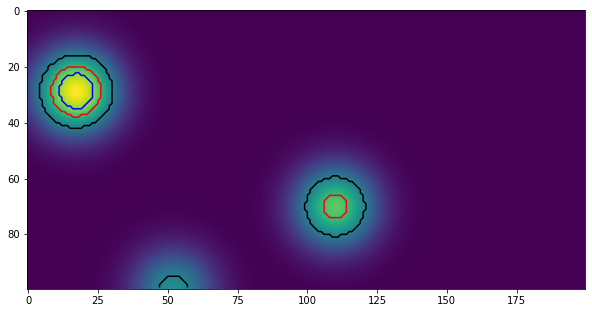

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(ncols = 1, figsize = (10, 10))

ax.imshow(data[50])
ax.contour(mask_1[50], levels = [0.5], colors = 'black')
ax.contour(mask_2[50], levels = [0.5], colors = 'red')
ax.contour(mask_3[50], levels = [0.5], colors = 'blue')

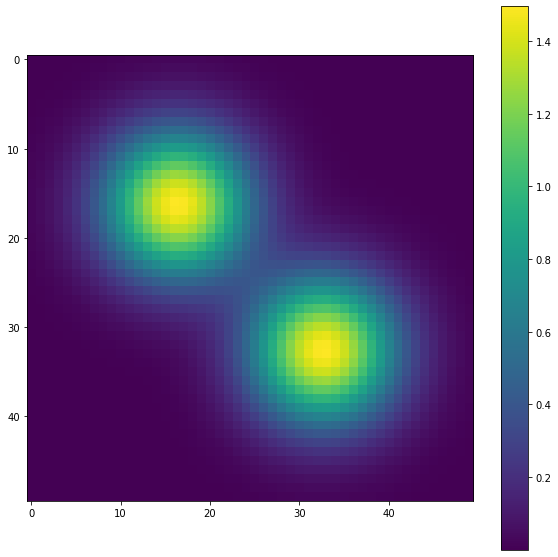

In [122]:
import numpy as np

x = np.linspace(-3, 3)
y = np.linspace(-3, 3)
xx, yy = np.meshgrid(x, y)

exp1 = 1.5*np.exp(-((xx+1)**2+(yy+1)**2))
exp2 = 1.5*np.exp(-((1-xx)**2+(1-yy)**2))

asymmetric_data = np.expand_dims(exp1 + exp2, axis=0)

plt.figure(figsize=(10,10))
plt.imshow(asymmetric_data[0])
plt.colorbar()

In [123]:
import xarray as xr

date = np.datetime64('2022-04-01T00:00', )
assym = xr.DataArray(data=asymmetric_data, coords={'time':np.expand_dims(date, axis = 0),'y':y, 'x':x})
assym

<xarray.DataArray (time: 1, y: 50, x: 50)>
array([[[5.03193942e-04, 8.08982942e-04, 1.26217600e-03, ...,
         2.84097094e-08, 1.30824379e-08, 6.18346087e-09],
        [8.08982942e-04, 1.30059873e-03, 2.02919544e-03, ...,
         5.35536234e-08, 2.60828595e-08, 1.30824379e-08],
        [1.26217600e-03, 2.02919544e-03, 3.16595276e-03, ...,
         1.03617229e-07, 5.35536234e-08, 2.84097094e-08],
        ...,
        [2.84097094e-08, 5.35536234e-08, 1.03617229e-07, ...,
         3.16595276e-03, 2.02919544e-03, 1.26217600e-03],
        [1.30824379e-08, 2.60828595e-08, 5.35536234e-08, ...,
         2.02919544e-03, 1.30059873e-03, 8.08982942e-04],
        [6.18346087e-09, 1.30824379e-08, 2.84097094e-08, ...,
         1.26217600e-03, 8.08982942e-04, 5.03193942e-04]]])
Coordinates:
  * time     (time) datetime64[ns] 2022-04-01
  * y        (y) float64 -3.0 -2.878 -2.755 -2.633 ... 2.633 2.755 2.878 3.0
  * x        (x) float64 -3.0 -2.878 -2.755 -2.633 ... 2.633 2.755 2.878 3.0

In [158]:
%%capture
dxy = (assym['x'][1] - assym['x'][0])
threshold = 0.7
features = tobac.themes.tobac_v1.feature_detection_multithreshold(assym, dxy, threshold= [threshold])
mask, features_mask = tobac.themes.tobac_v1.segmentation(features, assym, dxy, threshold=0.3)

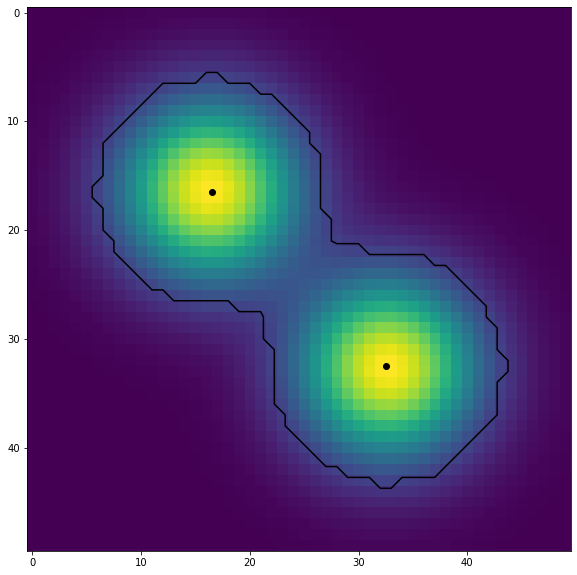

In [159]:
fig, ax = plt.subplots(ncols = 1, figsize = (10, 10))

ax.imshow(assym[0])
ax.scatter(features['hdim_2'], features['hdim_1'], color = 'k')
ax.contour(mask, levels = [0.5], colors = 'k')

In [157]:
features_mask

<xarray.Dataset>
Dimensions:          (index: 2)
Coordinates:
  * index            (index) int64 0 1
Data variables:
    frame            (index) int64 0 0
    idx              (index) int64 1 2
    hdim_1           (index) float64 16.49 32.51
    hdim_2           (index) float64 16.49 32.51
    num              (index) int64 162 162
    threshold_value  (index) float64 0.7 0.7
    feature          (index) int64 1 2
    time             (index) object 2022-04-01 00:00:00 2022-04-01 00:00:00
    timestr          (index) object '2022-04-01 00:00:00' '2022-04-01 00:00:00'
    y                (index) float64 -0.9803 0.9803
    x                (index) float64 -0.9803 0.9803
    ncells           (index) int64 112 112

## target

{'maximum', 'minimum'}, optional
        Flag to determine if tracking is targetting minima or maxima in
        the data. Default is 'maximum'.

## level : 
slice of iris.cube.Cube, optional
        Levels at which to seed the cells for the watershedding
        algorithm. Default is None.

## method : 
{'watershed'}, optional
        Flag determining the algorithm to use (currently watershedding
        implemented). 'random_walk' could be uncommented.

## max_distance : 
float, optional
        Maximum distance from a marker allowed to be classified as
        belonging to that cell. Default is None.

## vertical_coord : 
{'auto', 'z', 'model_level_number', 'altitude',
                      'geopotential_height'}, optional
        Name of the vertical coordinate for use in 3D segmentation case